In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

os.chdir("E:/EBAC/Material/Proyecto empresa aliada entregable 1")
calendarSales = pd.read_csv("calendarSales.csv")
productCatSeg = pd.read_csv("productCatSeg.csv")
productSales = pd.read_csv("productSales.csv")

In [2]:
productSales.head()

,WEEK,YEAR,MONTH,WEEK_NUMBER,DATE,ITEM,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,...,BRAND,ITEM_DESCRIPTION,CATEGORY,CATEGORY_NAME,FORMAT1,FORMAT2,ATTR1,ATTR2,ATTR3,SEGMENT
0,01-22,2022,1,1,2022-01-09,7501268200001,0.003,0.027,3.0,TOTAL AUTOS AREA 1,...,LA VALENCIANA,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...,1,FABRIC TREATMENT and SANIT\r\n,LIQUIDO,LIQUIDO,CLORO,CLORO,CLORO,BLEACH
1,01-22,2022,1,1,2022-01-09,7501268200001,0.003,0.027,3.0,TOTAL AUTOS AREA 1,...,LA VALENCIANA,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...,1,FABRIC TREATMENT and SANIT\r\n,LIQUIDO,LIQUIDO,CLORO,CLORO,CLORO,BLEACH
2,01-22,2022,1,1,2022-01-09,7501268200001,0.003,0.027,3.0,TOTAL AUTOS AREA 1,...,LA VALENCIANA,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...,1,FABRIC TREATMENT and SANIT\r\n,LIQUIDO,LIQUIDO,CLORO,CLORO,CLORO,BLEACH
3,01-22,2022,1,1,2022-01-09,7501268200001,0.003,0.027,3.0,TOTAL AUTOS AREA 1,...,LA VALENCIANA,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...,1,FABRIC TREATMENT and SANIT\r\n,LIQUIDO,GEL,CLORO,CLORO,CLORO,BLEACH
4,01-22,2022,1,1,2022-01-09,7501268200001,0.003,0.027,3.0,TOTAL AUTOS AREA 1,...,LA VALENCIANA,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...,1,FABRIC TREATMENT and SANIT\r\n,LIQUIDO,LIQUIDO,CLORO,CLORO,CLORO,BLEACH


In [3]:
Brands = productSales['BRAND'].unique()
Brands

array(['LA VALENCIANA', 'LOS PATITOS', 'OXI CLEAN', 'CLARASOL', 'CLOROX',
       'VANISH', 'SHOUT', 'DR.BECKMANN', 'SANYTOL', 'IBERIA', 'BLANCATEL',
       'CLORALEX', 'CUELLOS PUNOS Y MANCHITAS', 'BANDERA', 'BCLORHADA',
       'PURO SOL', 'OTHERS MARCA UNIF.', 'TIDE', 'LYSOL', 'LA JAPONESA',
       'CLORTEX', 'PATITO', 'CLORALUZ', 'HARPIC'], dtype=object)

In [4]:
# Filtramos las ventas para solo quedarnos con las marcas Vanish y Lysol
VanishLysolSales = productSales[productSales['BRAND'].isin(['VANISH', 'LYSOL'])]
VanishLysolSales.head()

,WEEK,YEAR,MONTH,WEEK_NUMBER,DATE,ITEM,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,...,BRAND,ITEM_DESCRIPTION,CATEGORY,CATEGORY_NAME,FORMAT1,FORMAT2,ATTR1,ATTR2,ATTR3,SEGMENT
884,01-22,2022,1,1,2022-01-09,7501058716422,0.033,2.2,2.357,TOTAL AUTOS AREA 6,...,VANISH,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,1,FABRIC TREATMENT and SANIT\r\n,POLVO,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH,BLEACH
885,01-22,2022,1,1,2022-01-09,7501058716422,0.033,2.2,2.357,TOTAL AUTOS AREA 6,...,VANISH,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,1,FABRIC TREATMENT and SANIT\r\n,POLVO,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH,BLEACH
886,01-22,2022,1,1,2022-01-09,7501058716422,0.033,2.2,2.357,TOTAL AUTOS AREA 6,...,VANISH,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,1,FABRIC TREATMENT and SANIT\r\n,POLVO,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH,BLEACH
887,01-22,2022,1,1,2022-01-09,7501058716422,0.033,2.2,2.357,TOTAL AUTOS AREA 6,...,VANISH,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,1,FABRIC TREATMENT and SANIT\r\n,POLVO,GEL,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH,BLEACH
888,01-22,2022,1,1,2022-01-09,7501058716422,0.033,2.2,2.357,TOTAL AUTOS AREA 6,...,VANISH,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,1,FABRIC TREATMENT and SANIT\r\n,POLVO,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH,BLEACH


Utilizaremos un modelo de series de tiempo debido a que nuestra informacion es secuencial y dependiente del tiempo ademas de la necesidad de predecir valores futuros

In [5]:
WeeklySales22 = VanishLysolSales[VanishLysolSales["YEAR"] == 2022]
WeeklySales23 = VanishLysolSales[VanishLysolSales["YEAR"] == 2023]
VanishLysolWeeklySales22 = WeeklySales22.groupby('WEEK')['TOTAL_VALUE_SALES'].sum()
VanishLysolWeeklySales22 = pd.DataFrame(VanishLysolWeeklySales22)
VanishLysolWeeklySales23 = WeeklySales23.groupby('WEEK')['TOTAL_VALUE_SALES'].sum()
VanishLysolWeeklySales23 = pd.DataFrame(VanishLysolWeeklySales23)
TotalWeeklySales = pd.concat([VanishLysolWeeklySales22, VanishLysolWeeklySales23], ignore_index=False)
TotalWeeklySales

,TOTAL_VALUE_SALES
WEEK,
01-22,1567490.132
02-22,1476009.652
03-22,1281626.840
04-22,1274591.968
05-22,1290169.088
...,...
24-23,1604955.352
25-23,1507934.584
26-23,1659153.236


In [6]:
# Dividimos los datos en conjunto de entrenamiento y prueba
# Podemos dividir simplemente el tamaño del dataframe debido a que se utilizara un modelo de series de tiempo

size_train = int(len(TotalWeeklySales) * 0.9) #Utilizaremos el 90% de los datos como entrenamiento debido al tamaño de los datos
size_test = int(len(TotalWeeklySales) * 0.1)

print("Base de entrenamiento: ", size_train, "Base de prueba: ", size_test)

Base de entrenamiento:  72 Base de prueba:  8


<Axes: xlabel='WEEK'>

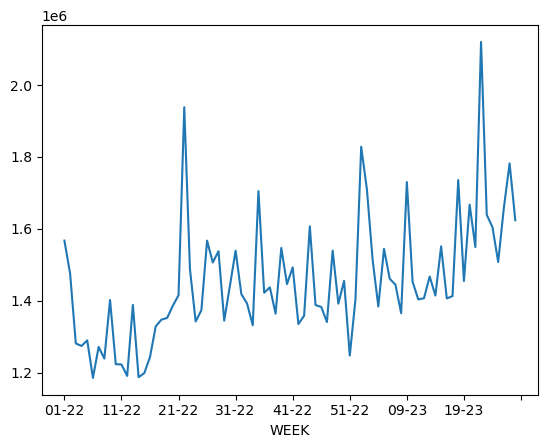

In [7]:
TotalWeeklySales["TOTAL_VALUE_SALES"].plot()

Realizando una visualizacion simple de los datos podemos identificar que existe una tendencia aunque no es muy facil de identificar

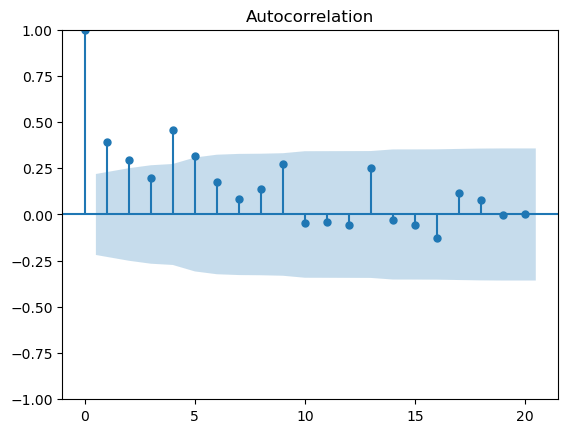

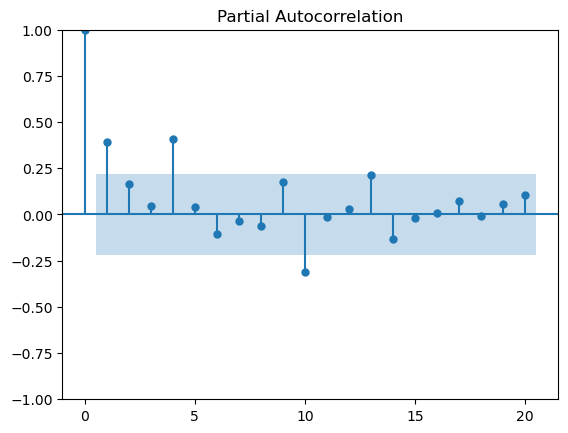

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(TotalWeeklySales['TOTAL_VALUE_SALES'])
plot_pacf(TotalWeeklySales['TOTAL_VALUE_SALES'])
plt.show()

Debido a que no se puede observar una estacionalidad regular se utilizara el modelo ARIMA sobre SARIMA

In [9]:
# Realizacion de la prueba Dickey-Fuller para conocer si los datos son estacionarios
# H0: La serie es NO ESTACIONARIA
# Ha: La serie SI ES ESTACIONARIA

from statsmodels.tsa.stattools import adfuller

# Tomar el 90% como base de entrenamiento
TotalWeeklySales_train = TotalWeeklySales[:size_train]
TotalWeeklySales_test = TotalWeeklySales[size_train:]

# Realizar Dickey-Fuller en el 90% de la data
adf_test = adfuller(TotalWeeklySales_train)

print("ADF Statistic:", adf_test[0])
print("El valor p de la prueba de Dickey-Fuller es: ", adf_test[1])
print("Valores Criticos: ", adf_test[4])


ADF Statistic: -1.5411110220541042
El valor p de la prueba de Dickey-Fuller es:  0.513085229199387
Valores Criticos:  {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}


Con un valor p de 0.513085 no podemos rechazar la hipotesis nula, no podemos decir que es no estacionaria

In [11]:
# Aplicar diferencias para remover la tendencia
TotalWeeklySales_train["SalesValue_dif"] = TotalWeeklySales_train["TOTAL_VALUE_SALES"].diff()
TotalWeeklySales_train = TotalWeeklySales_train.dropna()
TotalWeeklySales_train

C:\Users\BlewOs\AppData\Local\Temp\ipykernel_58988\2476374729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TotalWeeklySales_train["SalesValue_dif"] = TotalWeeklySales_train["TOTAL_VALUE_SALES"].diff()


,TOTAL_VALUE_SALES,SalesValue_dif
WEEK,,
02-22,1476009.652,-91480.480
03-22,1281626.840,-194382.812
04-22,1274591.968,-7034.872
05-22,1290169.088,15577.120
06-22,1185771.652,-104397.436
...,...,...
16-23,1406723.344,-144744.392
17-23,1413190.220,6466.876
18-23,1735635.772,322445.552


<Axes: xlabel='WEEK'>

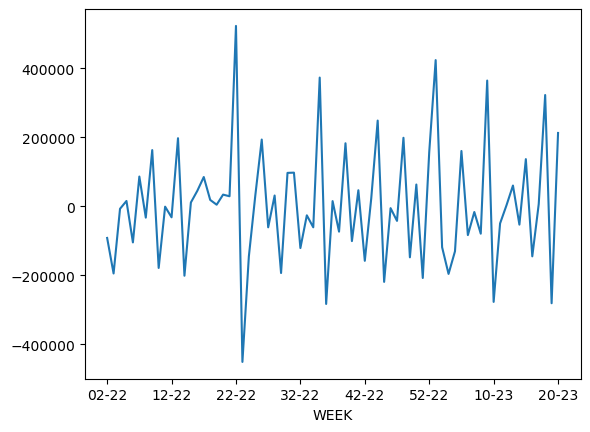

In [12]:
TotalWeeklySales_train["SalesValue_dif"].plot()

In [13]:
# Realizar Dickey-Fuller en las diferencias
adf_test_dif = adfuller(TotalWeeklySales_train["SalesValue_dif"])
print("El valor p de la prueba Dickey-Fuller es: ", adf_test_dif[1])

El valor p de la prueba Dickey-Fuller es:  0.07808562021140225


Con un valor p de 0.078 no podemos rechazar la H0 por lo que no podemos decir que la serie es estacionaria

In [14]:
# Aplicar diferencias doble para remover la tendencia
TotalWeeklySales_train["SalesValue_dif2"] = TotalWeeklySales_train["SalesValue_dif"].diff()
TotalWeeklySales_train = TotalWeeklySales_train.dropna()
TotalWeeklySales_train

C:\Users\BlewOs\AppData\Local\Temp\ipykernel_58988\492854676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TotalWeeklySales_train["SalesValue_dif2"] = TotalWeeklySales_train["SalesValue_dif"].diff()


,TOTAL_VALUE_SALES,SalesValue_dif,SalesValue_dif2
WEEK,,,
03-22,1281626.840,-194382.812,-102902.332
04-22,1274591.968,-7034.872,187347.940
05-22,1290169.088,15577.120,22611.992
06-22,1185771.652,-104397.436,-119974.556
07-22,1272090.924,86319.272,190716.708
...,...,...,...
16-23,1406723.344,-144744.392,-281499.140
17-23,1413190.220,6466.876,151211.268
18-23,1735635.772,322445.552,315978.676


<Axes: xlabel='WEEK'>

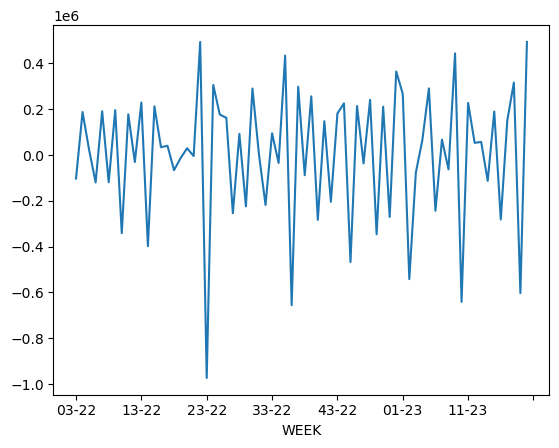

In [15]:
TotalWeeklySales_train["SalesValue_dif2"].plot()

In [16]:
# Realizar Dickey-Fuller en las diferencias
adf_test_dif = adfuller(TotalWeeklySales_train["SalesValue_dif2"])
print("El valor p de la prueba Dickey-Fuller es: ", adf_test_dif[1])

El valor p de la prueba Dickey-Fuller es:  0.002920451918636682


Al tener un valor p menor a 0.05, podemos decir que la serie es estacional

Al haber realizado dos diferencias, en ARIMA, el valor a utilizar en d seria de 2

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
# Importacion del modulo para estimar un modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Ajustar los datos a un model AR(1) e imprimir su AIC:
mod_ar1 = ARIMA(TotalWeeklySales_train["SalesValue_dif2"], order = (1,0,0))
res_ar1 = mod_ar1.fit()
print("El AIC para AR(1) es: ", res_ar1.aic)
print("El BIC para AR(1) es: ", res_ar1.bic)

El AIC para AR(1) es:  1932.8275611520748
El BIC para AR(1) es:  1939.5730468782228


In [19]:
# Ajustar los datos a un model AR(2) e imprimir su AIC:
mod_ar2 = ARIMA(TotalWeeklySales_train["SalesValue_dif2"], order = (2,0,0))
res_ar2 = mod_ar2.fit()
print("El AIC para AR(2) es: ", res_ar2.aic)
print("El BIC para AR(2) es: ", res_ar2.bic)

El AIC para AR(2) es:  1925.7664109955638
El BIC para AR(2) es:  1934.7603919637613


In [20]:
# Ajustar los datos a un model AR(3) e imprimir su AIC:
mod_ar3 = ARIMA(TotalWeeklySales_train["SalesValue_dif2"], order = (3,0,0))
res_ar3 = mod_ar3.fit()
print("El AIC para AR(3) es: ", res_ar3.aic)
print("El BIC para AR(3) es: ", res_ar3.bic)

El AIC para AR(3) es:  1903.19471097779
El BIC para AR(3) es:  1914.437187188037


In [21]:
# Ajustar los datos a un model AR(4) e imprimir su AIC:
mod_ar4 = ARIMA(TotalWeeklySales_train["SalesValue_dif2"], order = (4,0,0))
res_ar4 = mod_ar4.fit()
print("El AIC para AR(4) es: ", res_ar4.aic)
print("El BIC para AR(4) es: ", res_ar4.bic)

El AIC para AR(4) es:  1891.7922727149978
El BIC para AR(4) es:  1905.283244167294


In [22]:
# Ajustar los datos a un model AR(5) e imprimir su AIC:
mod_ar5 = ARIMA(TotalWeeklySales_train["SalesValue_dif2"], order = (5,0,0))
res_ar5 = mod_ar5.fit()
print("El AIC para AR(5) es: ", res_ar5.aic)
print("El BIC para AR(5) es: ", res_ar5.bic)

El AIC para AR(5) es:  1887.4051090689672
El BIC para AR(5) es:  1903.1445757633128


In [23]:
# Ajustar los datos a un model AR(5) e imprimir su AIC:
mod_ar6 = ARIMA(TotalWeeklySales_train["SalesValue_dif2"], order = (6,0,0))
res_ar6 = mod_ar6.fit()
print("El AIC para AR(5) es: ", res_ar6.aic)
print("El BIC para AR(5) es: ", res_ar6.bic)

El AIC para AR(5) es:  1887.9497688852575
El BIC para AR(5) es:  1905.9377308216524


Debido a que el AIC y BIC dejaron de disminuir significativamente, podemos tomar p = 5

In [24]:
# Ajustar los datos a un model ARMA(5,1) e imprimir su AIC:
mod_arma51 = ARIMA(TotalWeeklySales_train["SalesValue_dif2"], order = (5,0,1))
res_arma51 = mod_arma51.fit()
print("El AIC para ARMA(5,1) es: ", res_arma51.aic)
print("El AIC para ARMA(5,1) es: ", res_arma51.bic)

El AIC para ARMA(5,1) es:  1886.7166441789416
El AIC para ARMA(5,1) es:  1904.7046061153364


In [25]:
# Ajustar los datos a un model ARMA(5,2) e imprimir su AIC:
mod_arma52 = ARIMA(TotalWeeklySales_train["SalesValue_dif2"], order = (5,0,2))
res_arma52 = mod_arma52.fit()
print("El AIC para ARMA(5,2) es: ", res_arma52.aic)
print("El AIC para ARMA(5,2) es: ", res_arma52.bic)

El AIC para ARMA(5,2) es:  1888.5588495623613
El AIC para ARMA(5,2) es:  1908.7953067408055


Debido a que el AIC y BIC dejaron de disminuir significativamente, podemos tomar q = 1

Realizadas estas pruebas podemos determinar que el mejor modelo seria ARIMA(5,2,1)

In [44]:
# Volvemos a calcular las bases de prueba y entrenamiento para que incluyan los valores dropeados con al realizar las diferencias
TotalWeeklySales_train = TotalWeeklySales[:size_train]
TotalWeeklySales_test = TotalWeeklySales[size_train:]

In [45]:
# Importacion del modulo ARIMA de statsmodels
from statsmodels.graphics.tsaplots import plot_predict

# Pronostico de ventas usando un modelo ARIMA (5,2,1)
mod = ARIMA(TotalWeeklySales_train["TOTAL_VALUE_SALES"], order=(5,2,1))
res = mod.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:      TOTAL_VALUE_SALES   No. Observations:                   72
Model:                 ARIMA(5, 2, 1)   Log Likelihood                -952.321
Date:                Fri, 14 Mar 2025   AIC                           1918.641
Time:                        00:34:39   BIC                           1934.381
Sample:                             0   HQIC                          1924.893
                                 - 72                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1794      0.072     -2.503      0.012      -0.320      -0.039
ar.L2         -0.4606      0.094     -4.883      0.000      -0.645      -0.276
ar.L3         -0.3966      0.133     -2.978      0.0

In [46]:
# Pronostico puntual de la base de prueba tomando en cuenta Base de entrenamiento:  72 Base de prueba:  8

pd.set_option('display.float_format', '{:.6f}'.format)
predicciones = res.forecast(8)
predicciones = pd.DataFrame(predicciones)
predicciones

,predicted_mean
72,1680657.822825
73,1680163.286298
74,1605794.777044
75,1658771.103597
76,1679713.370792
77,1708311.289007
78,1710886.177170
79,1722586.041491


In [47]:
fechas = TotalWeeklySales.reset_index()
fechas = pd.DataFrame(fechas["WEEK"])

frames = [fechas, predicciones]
result = pd.concat(frames, axis=1, join = "inner")
result.columns = ['Year', 'Predicciones']
result.index = result["Year"]
result.drop(columns=["Year"], inplace=True)
result

,Predicciones
Year,
21-23,1680657.822825
22-23,1680163.286298
23-23,1605794.777044
24-23,1658771.103597
25-23,1679713.370792
26-23,1708311.289007
27-23,1710886.177170
28-23,1722586.041491


In [48]:
# Pronostico por intervalo de las 8 semanas restantes
conf = res.get_forecast(8).conf_int(alpha=0.05)
conf

,lower TOTAL_VALUE_SALES,upper TOTAL_VALUE_SALES
72,1373252.159148,1988063.486501
73,1279758.061548,2080568.511047
74,1185359.400660,2026230.153429
75,1234561.879300,2082980.327894
76,1240132.133679,2119294.607906
77,1242745.463201,2173877.114812
78,1213372.318871,2208400.035469
79,1199186.264478,2245985.818504


In [49]:
frames = [fechas, conf]
intervalos = pd.concat(frames, axis=1, join = 'inner')
intervalos.index = intervalos['WEEK']
intervalos.drop(columns=["WEEK"], inplace=True)
intervalos

,lower TOTAL_VALUE_SALES,upper TOTAL_VALUE_SALES
WEEK,,
21-23,1373252.159148,1988063.486501
22-23,1279758.061548,2080568.511047
23-23,1185359.400660,2026230.153429
24-23,1234561.879300,2082980.327894
25-23,1240132.133679,2119294.607906
26-23,1242745.463201,2173877.114812
27-23,1213372.318871,2208400.035469
28-23,1199186.264478,2245985.818504


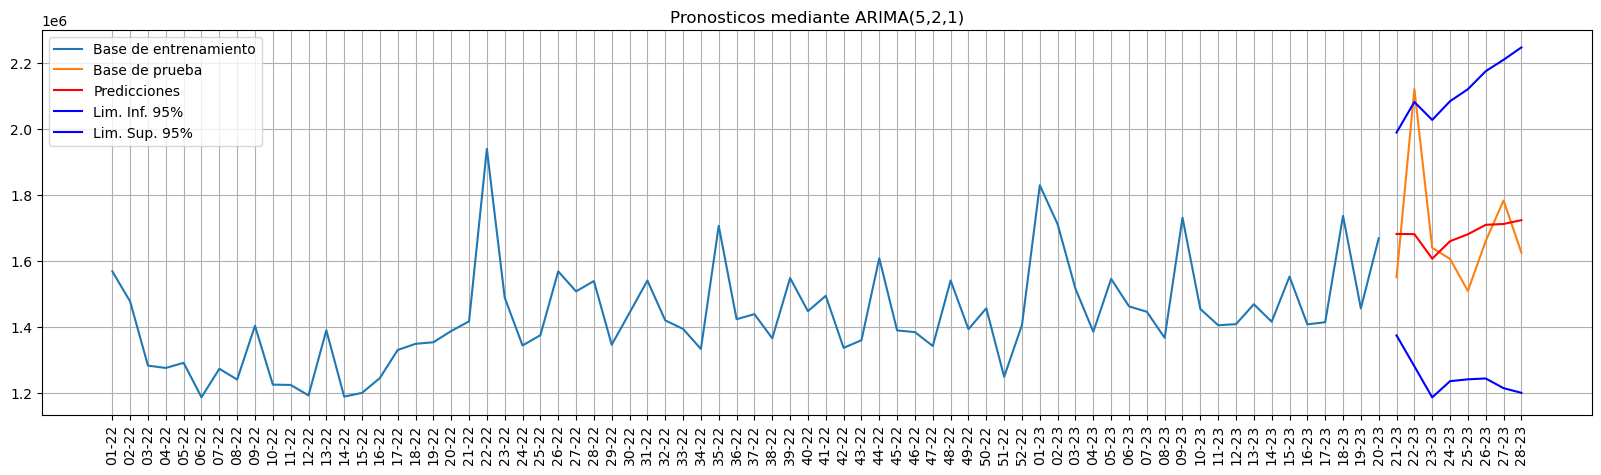

In [50]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(TotalWeeklySales_train, label = "Base de entrenamiento")
plt.plot(TotalWeeklySales_test, label = "Base de prueba")
plt.plot(result, label = "Predicciones", color = "red")
plt.plot(intervalos['lower TOTAL_VALUE_SALES'], label = "Lim. Inf. 95%", color = "blue")
plt.plot(intervalos['upper TOTAL_VALUE_SALES'], label = "Lim. Sup. 95%", color = "blue")
plt.xticks(rotation=90)
plt.legend(loc="best")
plt.title("Pronosticos mediante ARIMA(5,2,1)")
plt.show()

In [51]:
acumulador1 = 0
acumulador2 = 0

for contador in range(0, 8):
    acumulador1 = acumulador1 + (TotalWeeklySales_train.iloc[contador][0] - predicciones.iloc[contador][0]) ** 2
    acumulador2 = acumulador2 + np.abs((TotalWeeklySales_test.iloc[contador][0] - predicciones.iloc[contador][0]) /
                                       TotalWeeklySales_test.iloc[contador][0])
mse = acumulador1 / 8
rmse = np.round(np.sqrt(mse),2)
mape = np.round((acumulador2 / 8) * 100,2)
print("RMSE =", rmse, "MAPE = ", mape, "%")       

RMSE = 380447.69 MAPE =  7.37 %


Conclusion: Los pronosticos son confiables debido a que el error es solo de 7.37%